In [10]:
# Libraries
import pandas as pd
import networkx as nx
import numpy as np
from scipy.stats import pearsonr, spearmanr, kendalltau
import matplotlib.pyplot as plt

In [11]:
# Data
before_data = pd.read_csv("../Data/backbone_graphs/before_campaign_backbone.csv")
during_data = pd.read_csv("../Data/backbone_graphs/during_campaign_backbone.csv")
after_data = pd.read_csv("../Data/backbone_graphs/after_elections_backbone.csv")

# Some stats
print("before_data has shape: ", before_data.shape)
print("during_data has shape: ", during_data.shape)
print("after_data has shape: ", after_data.shape)

before_data has shape:  (38209, 4)
during_data has shape:  (56953, 4)
after_data has shape:  (42864, 4)


In [12]:
# Insights
before_data

,source,target,weight,p_value
0,3241806322,29416653,132,3.150182e-51
1,29416653,389131517,38,1.914250e-14
2,29416653,169566296,27,1.061201e-07
3,29416653,1342502335361273856,22,2.116990e-06
4,29416653,3308422191,20,6.992131e-06
...,...,...,...,...
38204,127532707,2301639524,4,4.440879e-02
38205,1489925735401799680,1391451476761923584,4,4.074783e-02
38206,434505068,3005727892,4,4.212454e-02
38207,1586682241,1071557549391011840,4,4.259258e-02


In [13]:
# Creating graphs
before_graph = nx.from_pandas_edgelist(before_data,
                                       source="source",
                                       target="target",
                                       edge_attr='weight',
                                       create_using=nx.DiGraph())

during_graph = nx.from_pandas_edgelist(during_data,
                                       source="source",
                                       target="target",
                                       edge_attr='weight',
                                       create_using=nx.DiGraph())

after_graph = nx.from_pandas_edgelist(after_data,
                                       source="source",
                                       target="target",
                                       edge_attr='weight',
                                       create_using=nx.DiGraph())

# Some stats
print("before_graph has ", before_graph.number_of_nodes(), " nodes and ", before_graph.number_of_edges(), " edges")
print("during_graph has ", during_graph.number_of_nodes(), " nodes and ", during_graph.number_of_edges(), " edges")
print("after_graph has ", after_graph.number_of_nodes(), " nodes and ", after_graph.number_of_edges(), " edges")

before_graph has  12008  nodes and  38209  edges
during_graph has  18150  nodes and  56953  edges
after_graph has  15943  nodes and  42864  edges


In [17]:
# Reading representatives data
representatives_data = pd.read_csv("../Data/twitter_representatives_handles_final.csv", dtype=str)

# Dropping the first 5 columns
representatives_data = representatives_data.drop(columns=representatives_data.columns[:5])

# Storing IDs and setting them as index
representative_IDs = representatives_data["ids"].tolist()
representatives_data = representatives_data.set_index("ids")

representatives_data.head()

,Name,Twitter-Handle,Party,Gender
ids,,,,
425752285,Bonelli Angelo,AngeloBonelli1,Alleanza Verdi Sinistra,M
417961167,Borrelli Francesco Emilio,NotizieFrance,Alleanza Verdi Sinistra,M
1228450685840220160,Dori Devis,DevisDori,Alleanza Verdi Sinistra,M
1135141640,Evi Eleonora,EleonoraEvi,Alleanza Verdi Sinistra,F
425686235,Fratoianni Nicola,NFratoianni,Alleanza Verdi Sinistra,M


In [19]:
# Computing in-strength distribution for each graph
# This method returns a dictionary {node: in_strength}
before_in_strength = {str(k): v for k,v in before_graph.in_degree(weight='weight')}
during_in_strength = {str(k): v for k,v in during_graph.in_degree(weight='weight')}
after_in_strength = {str(k): v for k,v in after_graph.in_degree(weight='weight')}

### How is in-strength distributed for representatives?

In [22]:
# Getting only the in-strengths of the representatives
before_representatives_in_strength = {k: before_in_strength[k] for k in before_in_strength if k in representative_IDs}
during_representatives_in_strength = {k: during_in_strength[k] for k in during_in_strength if k in representative_IDs}
after_representatives_in_strength = {k: after_in_strength[k] for k in after_in_strength if k in representative_IDs}

print("Representatives found before campaign: ", len(before_representatives_in_strength))
print("Representatives found during campaign: ", len(during_representatives_in_strength))
print("Representatives found after elections: ", len(after_representatives_in_strength))
print("\n")

# Getting the average in-strength
before_representatives_avg_in_strength = np.mean(list(before_representatives_in_strength.values())) if len(before_representatives_in_strength) > 0 else 0
during_representatives_avg_in_strength = np.mean(list(during_representatives_in_strength.values())) if len(during_representatives_in_strength) > 0 else 0
after_representatives_avg_in_strength = np.mean(list(after_representatives_in_strength.values())) if len(after_representatives_in_strength) > 0 else 0

# Getting the median in-strength
before_representatives_median_in_strength = np.median(list(before_representatives_in_strength.values())) if len(before_representatives_in_strength) > 0 else 0
during_representatives_median_in_strength = np.median(list(during_representatives_in_strength.values())) if len(during_representatives_in_strength) > 0 else 0
after_representatives_median_in_strength = np.median(list(after_representatives_in_strength.values())) if len(after_representatives_in_strength) > 0 else 0

# Getting the max in-strength
before_representatives_max_in_strength = max(list(before_representatives_in_strength.values())) if len(before_representatives_in_strength) > 0 else 0
during_representatives_max_in_strength = max(list(during_representatives_in_strength.values())) if len(during_representatives_in_strength) > 0 else 0
after_representatives_max_in_strength = max(list(after_representatives_in_strength.values())) if len(after_representatives_in_strength) > 0 else 0

# Getting the std in-strength (this would suggest the flatness of the distribution or the presence of hierarchy)
before_representatives_std_in_strength = np.std(list(before_representatives_in_strength.values())) if len(before_representatives_in_strength) > 0 else 0
during_representatives_std_in_strength = np.std(list(during_representatives_in_strength.values())) if len(during_representatives_in_strength) > 0 else 0
after_representatives_std_in_strength = np.std(list(after_representatives_in_strength.values())) if len(after_representatives_in_strength) > 0 else 0

# Printing the results
print("Before campaign: ")
print("Average in-degree: ", round(before_representatives_avg_in_strength, 3))
print("Median in-degree: ", round(before_representatives_median_in_strength, 3))
print("Max in-degree: ", before_representatives_max_in_strength)
print("Std in-degree: ", round(before_representatives_std_in_strength, 3))
print("-"*50)

print("During campaign: ")
print("Average in-degree: ", round(during_representatives_avg_in_strength, 3))
print("Median in-degree: ", round(during_representatives_median_in_strength, 3))
print("Max in-degree: ", during_representatives_max_in_strength)
print("Std in-degree: ", round(during_representatives_std_in_strength, 3))
print("-"*50)

print("After elections: ")
print("Average in-degree: ", round(after_representatives_avg_in_strength, 3))
print("Median in-degree: ", round(after_representatives_median_in_strength, 3))
print("Max in-degree: ", after_representatives_max_in_strength)
print("Std in-degree: ", round(after_representatives_std_in_strength, 3))


Representatives found before campaign:  100
Representatives found during campaign:  149
Representatives found after elections:  93


Before campaign: 
Average in-degree:  110.1
Median in-degree:  23.0
Max in-degree:  1547
Std in-degree:  239.002
--------------------------------------------------
During campaign: 
Average in-degree:  177.893
Median in-degree:  31.0
Max in-degree:  3388
Std in-degree:  446.265
--------------------------------------------------
After elections: 
Average in-degree:  79.419
Median in-degree:  17.0
Max in-degree:  1134
Std in-degree:  170.874


In [24]:
# Who is the representative with the highest in-degree in each graph?
before_representative_max_in_strength = max(before_representatives_in_strength, key=before_representatives_in_strength.get)
during_representative_max_in_strength = max(during_representatives_in_strength, key=during_representatives_in_strength.get)
after_representative_max_in_strength = max(after_representatives_in_strength, key=after_representatives_in_strength.get)

print("Representative with the highest in-degree before campaign: ", representatives_data.loc[before_representative_max_in_strength])
print("Representative with the highest in-degree during campaign: ", representatives_data.loc[during_representative_max_in_strength])
print("Representative with the highest in-degree after elections: ", representatives_data.loc[after_representative_max_in_strength])

Representative with the highest in-degree before campaign:  Name                    Marattin Luigi
Twitter-Handle                marattin
Party             Azione - Italia Viva
Gender                               M
Name: 616886078, dtype: object
Representative with the highest in-degree during campaign:  Name                    Marattin Luigi
Twitter-Handle                marattin
Party             Azione - Italia Viva
Gender                               M
Name: 616886078, dtype: object
Representative with the highest in-degree after elections:  Name                    Marattin Luigi
Twitter-Handle                marattin
Party             Azione - Italia Viva
Gender                               M
Name: 616886078, dtype: object


### How did the representatives' relevance changed within the periods?

In [33]:
# Getting representatives for each period
before_representatives_set = set(before_representatives_in_strength.keys())
during_representatives_set = set(during_representatives_in_strength.keys())
after_representatives_set = set(after_representatives_in_strength.keys())

# Debug
print("Representatives found before campaign: ", len(before_representatives_set))
print("Representatives found during campaign: ", len(during_representatives_set))
print("Representatives found after elections: ", len(after_representatives_set))

# Representatives that are present in all periods
common_representatives = before_representatives_set.intersection(during_representatives_set).intersection(after_representatives_set)
print("Representatives that are present in all periods: ", len(common_representatives))

# Representatives present in before and during
before_during_representatives = before_representatives_set.intersection(during_representatives_set)
print("Representatives that are present in before and during: ", len(before_during_representatives))

# Representatives present in before and after
before_after_representatives = before_representatives_set.intersection(after_representatives_set)
print("Representatives that are present in before and after: ", len(before_after_representatives))

# Representatives present in during and after
during_after_representatives = during_representatives_set.intersection(after_representatives_set)
print("Representatives that are present in during and after: ", len(during_after_representatives))

Representatives found before campaign:  100
Representatives found during campaign:  149
Representatives found after elections:  93
Representatives that are present in all periods:  68
Representatives that are present in before and during:  86
Representatives that are present in before and after:  71
Representatives that are present in during and after:  86


In [34]:
# Computing the Pearson correlation between the in-degrees of the representatives present in all periods
# Getting the in-degrees of the common representatives
before_common_representatives_in_strength = {k: before_representatives_in_strength[k] for k in common_representatives}
during_common_representatives_in_strength = {k: during_representatives_in_strength[k] for k in common_representatives}
after_common_representatives_in_strength = {k: after_representatives_in_strength[k] for k in common_representatives}

# Pearson correlation
pearson_before_during = pearsonr(list(before_common_representatives_in_strength.values()), list(during_common_representatives_in_strength.values()))
pearson_before_after = pearsonr(list(before_common_representatives_in_strength.values()), list(after_common_representatives_in_strength.values()))
pearson_during_after = pearsonr(list(during_common_representatives_in_strength.values()), list(after_common_representatives_in_strength.values()))

print("Pearson correlation between before and during: ", pearson_before_during)
print("Pearson correlation between before and after: ", pearson_before_after)
print("Pearson correlation between during and after: ", pearson_during_after)

Pearson correlation between before and during:  PearsonRResult(statistic=0.8661636069294218, pvalue=1.4760857054813384e-21)
Pearson correlation between before and after:  PearsonRResult(statistic=0.7570576379954809, pvalue=8.059401172255614e-14)
Pearson correlation between during and after:  PearsonRResult(statistic=0.855642773447755, pvalue=1.5055988433107847e-20)


In [35]:
# Computing the average gain in in-degree for the common representatives
# Getting the gain
gain_before_during = {k: during_common_representatives_in_strength[k] - before_common_representatives_in_strength[k] for k in common_representatives}
gain_before_after = {k: after_common_representatives_in_strength[k] - before_common_representatives_in_strength[k] for k in common_representatives}
gain_during_after = {k: after_common_representatives_in_strength[k] - during_common_representatives_in_strength[k] for k in common_representatives}

# Getting the average gain
avg_gain_before_during = np.mean(list(gain_before_during.values()))
avg_gain_before_after = np.mean(list(gain_before_after.values()))
avg_gain_during_after = np.mean(list(gain_during_after.values()))

print("Average gain in in-degree from before to during: ", avg_gain_before_during)
print("Average gain in in-degree from before to after: ", avg_gain_before_after)
print("Average gain in in-degree from during to after: ", avg_gain_during_after)

Average gain in in-degree from before to during:  189.47058823529412
Average gain in in-degree from before to after:  -42.455882352941174
Average gain in in-degree from during to after:  -231.9264705882353


### Who is the representative that gained most interest during each pair of periods?

In [36]:
# For each representative, computing the gain in in-degree between two periods
gains_before_during = {k: during_representatives_in_strength[k] - before_representatives_in_strength[k] for k in before_during_representatives}
gains_before_after = {k: after_representatives_in_strength[k] - before_representatives_in_strength[k] for k in before_after_representatives}
gains_during_after = {k: after_representatives_in_strength[k] - during_representatives_in_strength[k] for k in during_after_representatives}

# Getting the max gain in in-degree and the representative
max_gain_before_during = max(gains_before_during, key=gains_before_during.get)
max_gain_before_after = max(gains_before_after, key=gains_before_after.get)
max_gain_during_after = max(gains_during_after, key=gains_during_after.get)

print("Max gain in in-degree from before to during: ", max_gain_before_during, representatives_data.loc[max_gain_before_during].Name, gains_before_during[max_gain_before_during])
print("Max gain in in-degree from before to after: ", max_gain_before_after, representatives_data.loc[max_gain_before_after].Name, gains_before_after[max_gain_before_after])
print("Max gain in in-degree from during to after: ", max_gain_during_after, representatives_data.loc[max_gain_during_after].Name, gains_during_after[max_gain_during_after])

Max gain in in-degree from before to during:  616886078 Marattin Luigi 1841
Max gain in in-degree from before to after:  455562995 Paita Raffaella 350
Max gain in in-degree from during to after:  2416067982 Calenda Carlo 378


### And the one that lost most interest during each pair of periods?

In [38]:
# For each representative, getting the one that lost the most in in-degree between two periods
min_gain_before_during = min(gains_before_during, key=gains_before_during.get)
min_gain_before_after = min(gains_before_after, key=gains_before_after.get)
min_gain_during_after = min(gains_during_after, key=gains_during_after.get)

print("Max loss in in-degree from before to during: ", min_gain_before_during, representatives_data.loc[min_gain_before_during].Name, gains_before_during[min_gain_before_during])
print("Max loss in in-degree from before to after: ", min_gain_before_after, representatives_data.loc[min_gain_before_after].Name, gains_before_after[min_gain_before_after])
print("Max loss in in-degree from during to after: ", min_gain_during_after, representatives_data.loc[min_gain_during_after].Name, gains_during_after[min_gain_during_after])

Max loss in in-degree from before to during:  876541483 Bagnai Alberto -322
Max loss in in-degree from before to after:  999578121123848192 Conte Giuseppe -967
Max loss in in-degree from during to after:  616886078 Marattin Luigi -2254


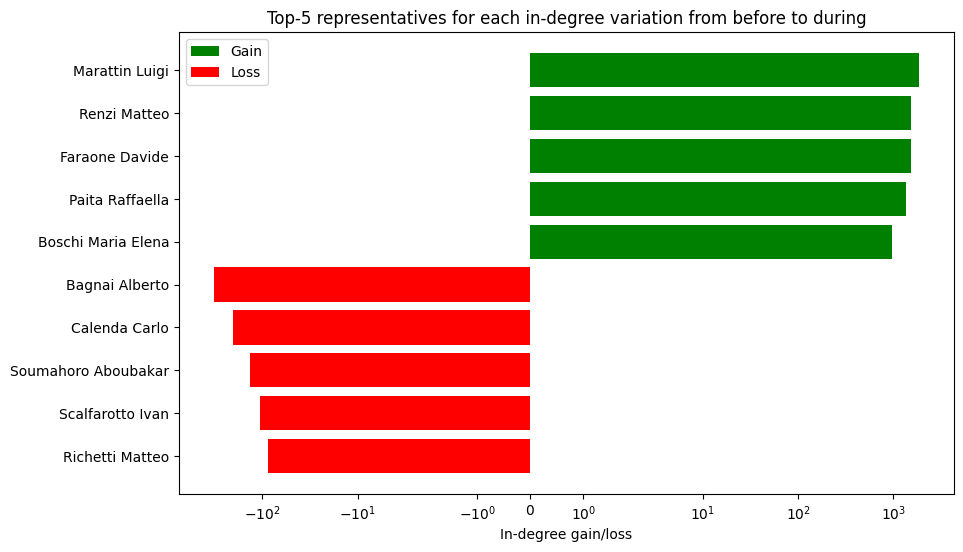

In [39]:
# Getting the top-5 representatives that gained the most in in-degree from before to during
top5_gains_before_during = sorted(gains_before_during.items(), key=lambda x: x[1], reverse=True)[:5]
top5_losses_before_during = sorted(gains_before_during.items(), key=lambda x: x[1])[:5]

# Getting the names and gains
top5_gains_names = [representatives_data.loc[x[0]].Name for x in top5_gains_before_during]
top5_gains_values = [x[1] for x in top5_gains_before_during]

top5_losses_names = [representatives_data.loc[x[0]].Name for x in top5_losses_before_during]
top5_losses_values = [x[1] for x in top5_losses_before_during]

# Plotting
plt.figure(figsize=(10,6))
plt.barh(top5_gains_names, top5_gains_values, color='green', label='Gain')
plt.barh(top5_losses_names, top5_losses_values, color='red', label='Loss')

# Improve the scale of the x-axis
plt.xscale('symlog')

plt.xlabel("In-degree gain/loss")
plt.title("Top-5 representatives for each in-degree variation from before to during")
plt.legend()

# Showing gains before losses
plt.gca().invert_yaxis()

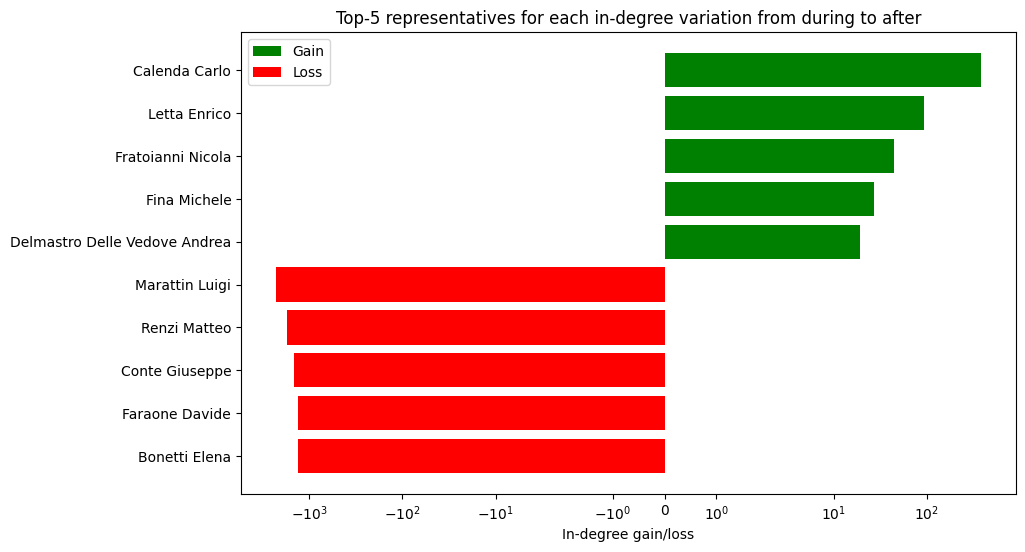

In [40]:
# Getting the top-5 representatives that gained the most in in-degree from during to after
top5_gains_during_after = sorted(gains_during_after.items(), key=lambda x: x[1], reverse=True)[:5]
top5_losses_during_after = sorted(gains_during_after.items(), key=lambda x: x[1])[:5]

# Getting the names and gains
top5_gains_names = [representatives_data.loc[x[0]].Name for x in top5_gains_during_after]
top5_gains_values = [x[1] for x in top5_gains_during_after]

top5_losses_names = [representatives_data.loc[x[0]].Name for x in top5_losses_during_after]
top5_losses_values = [x[1] for x in top5_losses_during_after]

# Plotting
plt.figure(figsize=(10,6))
plt.barh(top5_gains_names, top5_gains_values, color='green', label='Gain')
plt.barh(top5_losses_names, top5_losses_values, color='red', label='Loss')

# Improve the scale of the x-axis
plt.xscale('symlog')

plt.xlabel("In-degree gain/loss")
plt.title("Top-5 representatives for each in-degree variation from during to after")
plt.legend()

# Showing gains before losses
plt.gca().invert_yaxis()

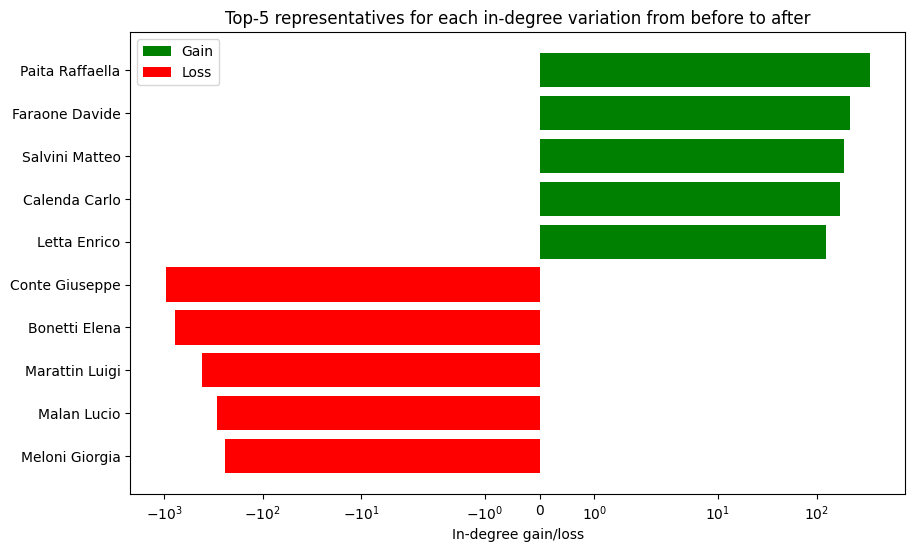

In [41]:
# Getting the top-5 representatives that gained the most in in-degree from before to after
top5_gains_before_after = sorted(gains_before_after.items(), key=lambda x: x[1], reverse=True)[:5]
top5_losses_before_after = sorted(gains_before_after.items(), key=lambda x: x[1])[:5]

# Getting the names and gains
top5_gains_names = [representatives_data.loc[x[0]].Name for x in top5_gains_before_after]
top5_gains_values = [x[1] for x in top5_gains_before_after]

top5_losses_names = [representatives_data.loc[x[0]].Name for x in top5_losses_before_after]
top5_losses_values = [x[1] for x in top5_losses_before_after]

# Plotting
plt.figure(figsize=(10,6))
plt.barh(top5_gains_names, top5_gains_values, color='green', label='Gain')
plt.barh(top5_losses_names, top5_losses_values, color='red', label='Loss')

# Improve the scale of the x-axis
plt.xscale('symlog')

plt.xlabel("In-degree gain/loss")
plt.title("Top-5 representatives for each in-degree variation from before to after")
plt.legend()

# Showing gains before losses
plt.gca().invert_yaxis()